## Importing Libraries

In [58]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading file

In [59]:
#loading the file
filename = 'Group_11_dataframe.xls'
df = pd.read_excel(filename)

## Using .head() to see the first 5 rows

In [60]:
df.head()

,video_title,view_count,category,duration_in_seconds,upload_time,captured_time,num_dislikes,num_likes,video_desp,ratio,new_view_count
0,Elmo and Cookie Monster have some Adult Fun,1313791,Comedy,42,2008-12-28T21:57:55.000Z,01/18/13,193,9671,Discovered completely by accident by putting t...,98.043390,1.313791
1,First Blog / Dorkiness Prevails,4484903,Film,95,2006-06-16T18:49:21.000Z,01/18/13,4390,5678,"So, I finally got a webcam and got it working ...",56.396504,4.484903
2,We Love You Maria Venus Raj 22 Philippines,3556190,Entertainment,253,2010-08-24T08:27:12.000Z,01/18/13,855,16005,"We are only among many who went wild. Irina, M...",94.928826,3.556190
3,shiba inu white pupy 【超可愛い】【初公開】白柴くもくんの鳴き声,5914475,Animals,49,2009-09-19T05:53:24.000Z,01/18/13,395,38612,生まれて9日目のくもくんです。 Thank you for watching this mo...,98.987361,5.914475
4,Mariko Takahashi's Fitness Video,590989,Howto,210,2006-03-16T05:43:31.000Z,01/18/13,186,1477,This is a mesmerizing and frightening video. I...,88.815394,0.590989


## Checking our datatype

In [61]:
df.info()
#this is also helpful to see if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_title          446 non-null    object 
 1   view_count           446 non-null    int64  
 2   category             446 non-null    object 
 3   duration_in_seconds  446 non-null    int64  
 4   upload_time          446 non-null    object 
 5   captured_time        446 non-null    object 
 6   num_dislikes         446 non-null    int64  
 7   num_likes            446 non-null    int64  
 8   video_desp           445 non-null    object 
 9   ratio                446 non-null    float64
 10  new_view_count       446 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 38.5+ KB


- There were 2 missing rows for the Ratio column:
    This was because the likes and dislikes for these videos are equal to 0, and dividing by 0 results in an error (NaN value). The ratio for these two rows has been assigned to 0.
- The 'new_view_count' column is the 'view_count' column divided by 1 million. All the videos in the dataframe have at least 1 million views, so this new column enables us to look at the values in an easier way.
- The 'ratio' column is the percentage of likes a video gets. It was calculated using the following formula: (num_likes/(num_likes + num_dislikes) * 100)


## Scatterplots

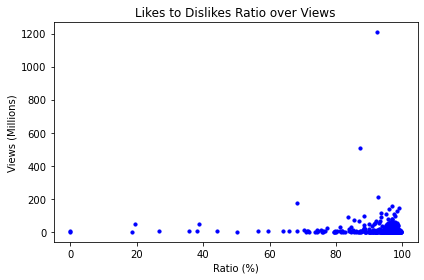

In [62]:
#matplotlib scatter plot

x = df.ratio
y = df.new_view_count
plt.scatter(x,y, s=10, c='blue')
plt.xlabel('Ratio (%)')
plt.ylabel('Views (Millions)')
plt.title('Likes to Dislikes Ratio over Views')
plt.tight_layout()

### This scatter plot is hard to look at because of the outliers who make it to zoomed out. 
### To make it clearer, a new scatter plot will be made without these outliers.

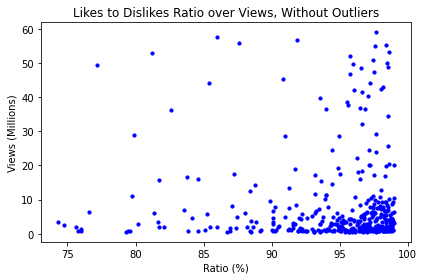

In [63]:
#removing outliers
x = df['ratio']
removed_outliers1 = x.between(x.quantile(.05), x.quantile(.95))
y = df['new_view_count']
removed_outliers2 = y.between(y.quantile(.05), y.quantile(.95))
#doing a scatterplot
plt.scatter(x[removed_outliers1],y[removed_outliers2], s=10, c='blue')
plt.xlabel('Ratio (%)')
plt.ylabel('Views (Millions)')
plt.title('Likes to Dislikes Ratio over Views, Without Outliers')
plt.tight_layout()


## Boxplot
### Since many outliers were observable, I thought it would be interesting to do a boxplot

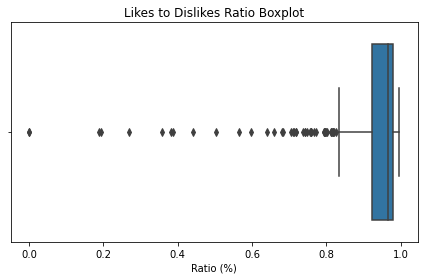

In [42]:
## boxplot of the ratio column
sns.boxplot(x='ratio', data=df)
plt.suptitle("")
plt.xlabel('Ratio (%)')
plt.title('Likes to Dislikes Ratio Boxplot')

plt.tight_layout()

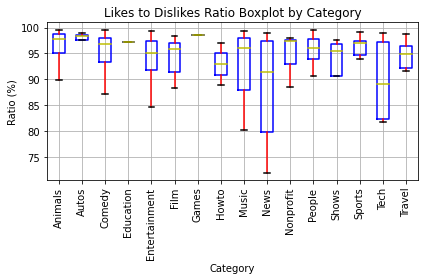

In [65]:
##boxplot of the 'ratio' column for each category
df.boxplot(column='ratio', by ='category', color=dict(boxes='b', whiskers='r', medians='y', caps='k'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=90)
plt.suptitle("")
plt.xlabel('Category')

plt.ylabel('Ratio (%)')
plt.title('Likes to Dislikes Ratio Boxplot by Category')

plt.tight_layout()